In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from dython.nominal import associations

In [72]:
df= pd.read_csv('spotifyData.csv', encoding='ISO-8859-1')
df = df.drop(['X', 'title'], axis=1) #removed column of indexes 
df.head()

,artist,top.genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,emo,ins
0,Train,neo mellow,2010,97.0,89.0,67.0,NaN,8.0,80.0,217.0,19.0,4.0,83.0,16.920,92.16
1,Eminem,detroit hip hop,2010,87.0,93.0,75.0,-5.0,52.0,64.0,263.0,24.0,23.0,82.0,30.456,73.92
2,Kesha,dance pop,2010,120.0,84.0,76.0,-3.0,29.0,71.0,200.0,10.0,14.0,80.0,24.534,82.56
3,Lady Gaga,dance pop,2010,119.0,92.0,70.0,-4.0,8.0,71.0,295.0,0.0,4.0,NaN,24.534,92.16
4,Bruno Mars,pop,2010,109.0,84.0,64.0,-5.0,9.0,43.0,221.0,2.0,4.0,78.0,48.222,92.16


# Analysis

Amount of songs for each year

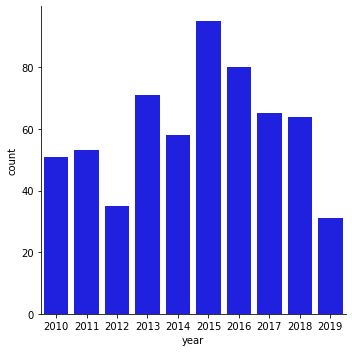

In [3]:
sns.catplot(x = 'year', data = df, kind = 'count', color='blue')

Top of 10 genres from 2010 to 2019

In [4]:
def get_top_df(df, top = 10): #change 'top' value to see another top 

    top_lst = df.iloc[:]['top.genre'].value_counts().index[top:]
    df_other = df.replace(top_lst, 'Other')
    order_lst = list(df_other['top.genre'].value_counts().index)
    order_lst.remove('Other') #remove first 'Other'
    order_lst.append('Other') #append to the end 'Other'

    return df_other, order_lst

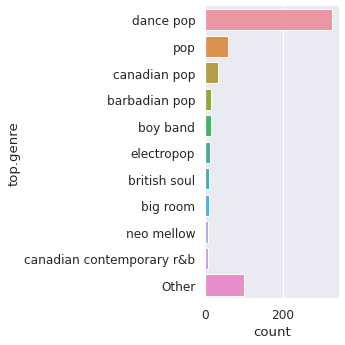

In [5]:
sns.set(font_scale=1.1)

df_top, order_lst = get_top_df(df)

sns.catplot(y = 'top.genre', data = df_top, kind = 'count', order= order_lst)

Percentage normalization

<AxesSubplot:xlabel='value', ylabel='Genre'>

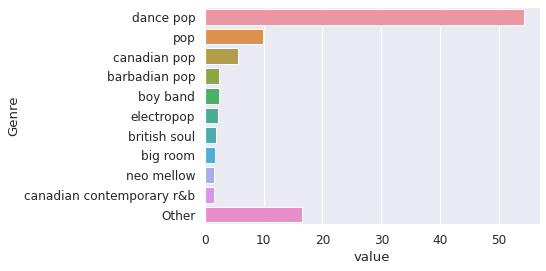

In [6]:
genre_counter = df_top['top.genre'].value_counts()
dict = {'value': genre_counter.values / sum(genre_counter.values) *100, 'Genre': genre_counter.index} #getting precenage
tmp = pd.DataFrame(dict)
sns.barplot(data=tmp, y = 'Genre', x='value',  order = order_lst, dodge=False, orient= 'h')


Top of 3 genres from 2010 to 2019

In [7]:
counted_genre = df.groupby(['top.genre', 'year']).size().unstack(fill_value=0)

In [8]:
df1 = pd.DataFrame()
for i in list(counted_genre.columns):
    df2 = counted_genre[i].sort_values(ascending=False)[:3]
    dict = {'Amount of songs': list(df2.values), 'genre': df2.index, 'year':i}
    tmp = pd.DataFrame(dict)
    df1 = df1.append(tmp, ignore_index=True)

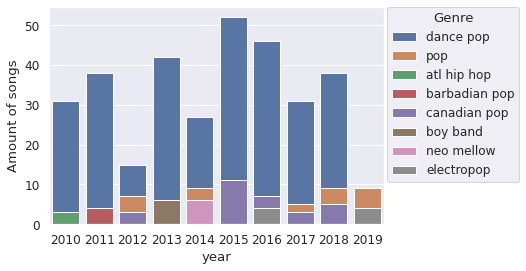

In [9]:
sns.barplot(data=df1, y = 'Amount of songs', x='year', hue = 'genre', dodge=False)
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0, title = "Genre")

Text(0, 0.5, 'Amount of songs')

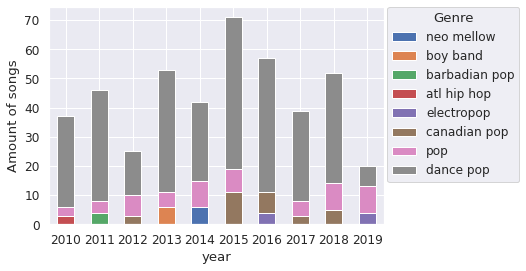

In [10]:
orderOfgenres = df1['genre'].value_counts().index[: : -1]
ax = df1.pivot(index='year', columns='genre', values='Amount of songs').iloc[:][orderOfgenres].plot(kind='bar', stacked=True, rot=0)

plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0, title = "Genre")
plt.ylabel('Amount of songs')

## Fix nan values

In [11]:
for i in range(3, 14): # Nan values are changed to a mean value that depends from genre name #until 'pop' columns 
    df_nan = df[df.iloc[:, i].isna()]
    df_nan = df_nan.loc[:, ['top.genre']]
    
    for j in range(len(df_nan)):
        artist_genre = df_nan.iloc[j].values
        df_artist_genre = df[df.loc[:, ['top.genre']].isin(artist_genre).all(axis=1)]
        mean = df_artist_genre.iloc[:, i].dropna().mean()
        index = df_artist_genre[df_artist_genre.iloc[:, i].isna()].index
        df.iloc[index, i] = mean

In [12]:
df[df['bpm'].isnull()]

,artist,top.genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,emo,ins
273,Hozier,irish singer-songwriter,2015,NaN,66.0,57.0,-5.0,12.0,44.0,242.0,63.0,5.0,81.0,47.376,91.2


In [13]:
df.iloc[273, 3] = 129 # found by the internet

Correlation Heatmap

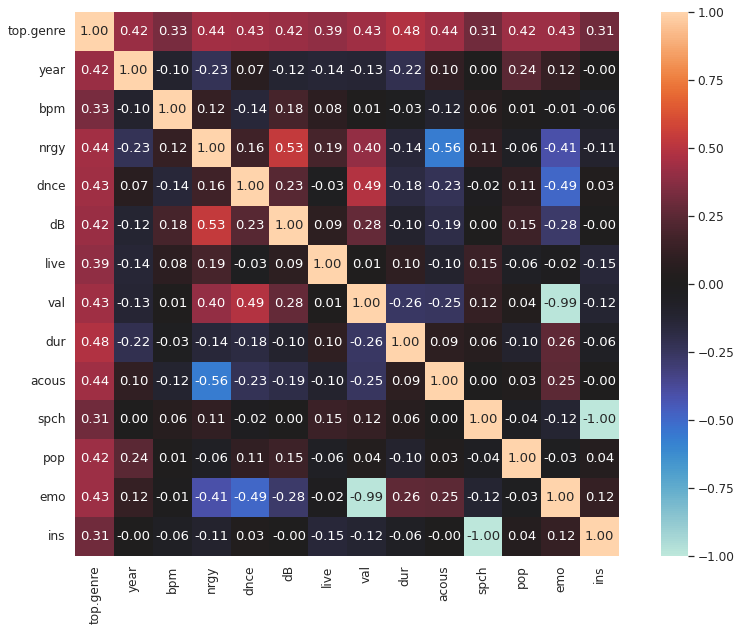

In [14]:
complete_correlation= associations(df.iloc[:, 1:], figsize=(15,10))

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,603.0,2014.592040,2.607057,2010.000,2013.000,2015.000,2017.00,2019.0
bpm,603.0,118.547148,24.655726,0.000,100.000,120.000,129.00,206.0
nrgy,603.0,70.459754,16.289742,0.000,61.000,74.000,82.00,98.0
dnce,603.0,64.501856,13.171167,0.000,57.000,66.000,73.00,97.0
dB,603.0,-5.590898,2.797266,-60.000,-6.000,-5.000,-4.00,-2.0
live,603.0,17.769169,12.902752,0.000,9.000,12.000,24.00,74.0
val,603.0,51.964295,22.221024,0.000,35.000,52.000,68.00,98.0
dur,603.0,224.730440,34.106033,134.000,202.000,221.000,239.50,424.0
acous,603.0,14.380546,20.748883,0.000,2.000,6.000,17.00,99.0
spch,603.0,8.367505,7.481297,0.000,4.000,5.000,9.00,48.0


In [16]:
#order = list(df['top.genre'].value_counts().index)
order = df['top.genre'].value_counts()[df['top.genre'].value_counts().values > 10].index # get sorted genres with more than 10 songs 

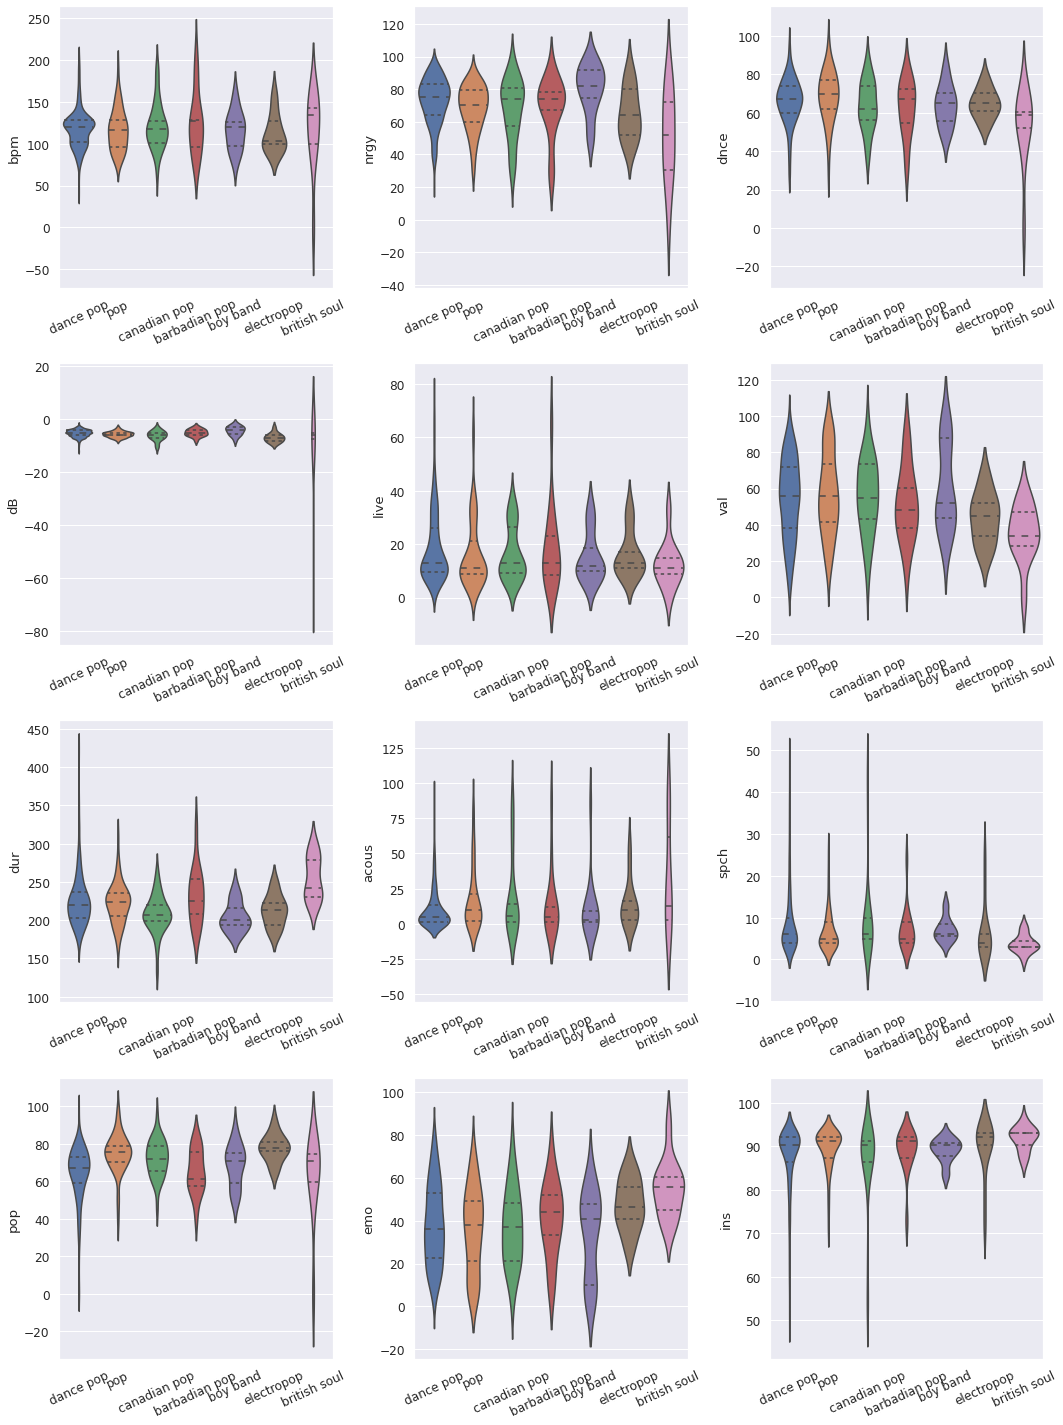

In [17]:
numerical_cols = df.drop('year', axis= 1).select_dtypes('number').columns.to_list()

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15,20))
axs = np.ravel(axs)

for i, col in enumerate(numerical_cols):
    plt.sca(axs[i])
    sns.violinplot(data=df, x='top.genre', y= col, order = order, inner="quartile")
    plt.xlabel("")
    plt.xticks(rotation=25)

plt.tight_layout()
plt.show()

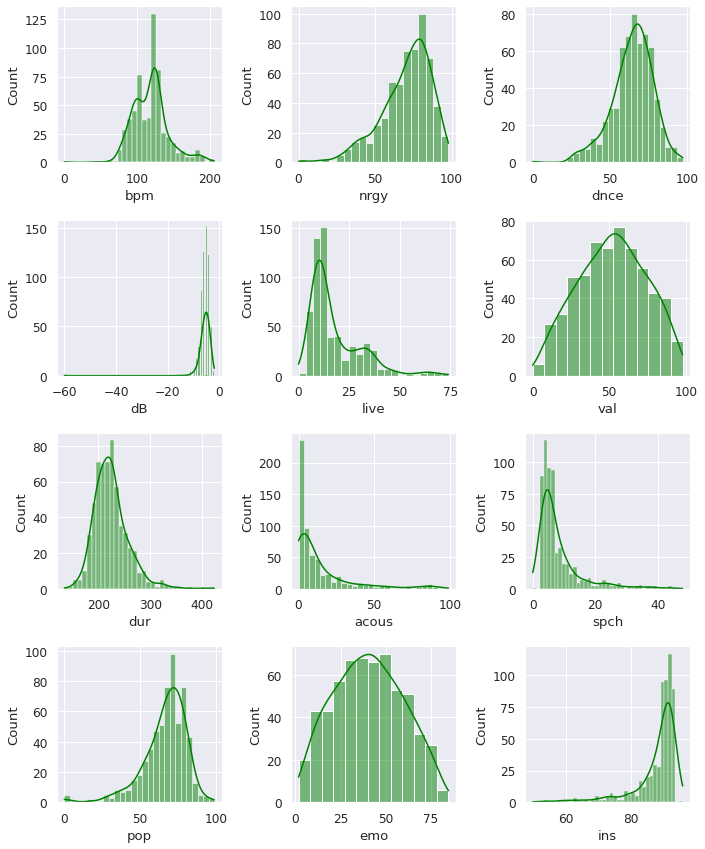

In [18]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(10,12))
axs = np.ravel(axs)

for i, col in enumerate(numerical_cols):
    plt.sca(axs[i])
    sns.histplot(data=df, x=col, kde=True, color='green')

plt.tight_layout()
plt.show()

-dnce, val, dur, emo, pop have an appoximately normal distribution.

-nrgy, dB, ins features are pressed to the right side

-live, acous, spch features are pressed to the left side

## Predictions and Models 

In [21]:
from sklearn.preprocessing import LabelEncoder

artist_le= LabelEncoder()
artist_labels = artist_le.fit_transform(df['artist'])

top_genre = LabelEncoder()
label_genres = artist_le.fit_transform(df['top.genre'])

In [22]:
df1 =df.copy()
df1['artist'] = artist_labels
df1['top.genre'] = label_genres

In [23]:
X = df1.drop('top.genre', axis = 1)
y = df1['top.genre']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)